In this Lab we will learn and use K-Nearest Neighbors to predict a data point. But what is **K-Nearest Neighbors**?

**K-Nearest Neighbors** is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src = "https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

Label info: 1- Basic Service, 2- E-Service, 3- Plus Service, 4-Total service

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [3]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Lets' see how many of each class have instance is in our dataset

In [5]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff715127ba8>]],
      dtype=object)

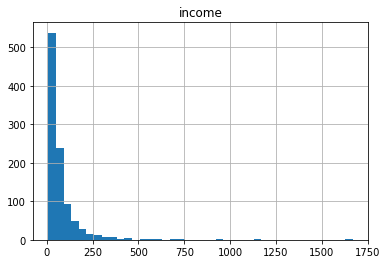

In [6]:
#Data visualization
df.hist(column='income',bins=40)

In [10]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [11]:
#feature set
X = df[['region','tenure','age','marital','address','income', 'ed','employ', 'retire', 'gender', 'reside']].values
X[0:10]



array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.],
       [  2.,  41.,  39.,   0.,  17.,  78.,   2.,  16.,   0.,   1.,   1.],
       [  3.,  45.,  22.,   1.,   2.,  19.,   2.,   4.,   0.,   1.,   5.],
       [  2.,  38.,  35.,   0.,   5.,  76.,   2.,  10.,   0.,   0.,   3.],
       [  3.,  45.,  59.,   1.,   7., 166.,   4.,  31.,   0.,   0.,   5.],
       [  1.,  68.,  41.,   1.,  21.,  72.,   1.,  22.,   0.,   0.,   3.]])

In [12]:
#Label
y = df['custcat'].values
y[0:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2])

In [15]:
#Normalize Data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]


array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [19]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape



((800, 11), (200, 11))

K-NN Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
k = 23
#Model trainig
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [41]:
X_test

array([[-1.25277087,  0.39692485,  1.22015191, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553,  1.42741184, -0.21382135, ..., -0.22207644,
         0.96655883, -0.92747794],
       [-0.02696767, -1.61720881, -1.56812942, ..., -0.22207644,
        -1.03459817, -0.92747794],
       ...,
       [-0.02696767,  0.16272326,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.42984754,  0.4235001 , ..., -0.22207644,
         0.96655883, -0.92747794],
       [-0.02696767,  0.95900866,  0.98115637, ..., -0.22207644,
         0.96655883, -0.92747794]])

In [42]:
#Prdict
y_pred = knn.predict(X_test)
y_pred[0:10]

array([3, 1, 1, 3, 1, 4, 3, 1, 1, 1])

In [43]:
from sklearn import metrics
metrics.accuracy_score(y_train,knn.predict(X_train)),metrics.accuracy_score(y_test,y_pred)

(0.4675, 0.325)

In [35]:
ks = 30
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
Confusion_mx = []
for n in range(1,ks):
  #Train Model and Predict

  knn = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
  y_pred= knn.predict(X_test)
  mean_acc[n-1]= metrics.accuracy_score(y_test,y_pred)
  

mean_acc




array([0.27 , 0.25 , 0.285, 0.27 , 0.32 , 0.295, 0.305, 0.335, 0.33 ,
       0.315, 0.34 , 0.33 , 0.355, 0.31 , 0.33 , 0.345, 0.33 , 0.37 ,
       0.355, 0.335, 0.32 , 0.33 , 0.325, 0.33 , 0.35 , 0.345, 0.34 ,
       0.365, 0.345])

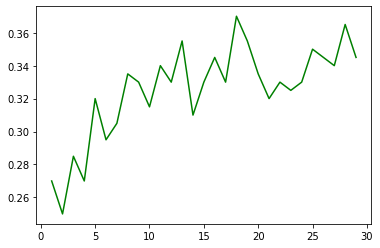

In [36]:
plt.plot(range(1,ks),mean_acc,'g')
plt.show()

In [39]:
print('The best accuracy was with ', mean_acc.max(), 'with k', mean_acc.argmax()+1)

The best accuracy was with  0.37 with k 18


In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[23  3 17  7]
 [14  7 14  8]
 [18  8 26  6]
 [18  9 13  9]]
              precision    recall  f1-score   support

           1       0.32      0.46      0.37        50
           2       0.26      0.16      0.20        43
           3       0.37      0.45      0.41        58
           4       0.30      0.18      0.23        49

    accuracy                           0.33       200
   macro avg       0.31      0.31      0.30       200
weighted avg       0.32      0.33      0.31       200



In [46]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']


dataset = pd.read_csv(url, names=names)

In [ ]:
dataset.head()

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

y_hat = nb.predict(X_test)

y_hat

In [54]:
metrics.accuracy_score(y_test,y_hat)

0.34

In [52]:
confusion_matrix(y_test, y_hat)

array([[32,  2, 10,  6],
       [20,  9,  6,  8],
       [26,  8, 18,  6],
       [22,  5, 13,  9]])

In [56]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.32      0.64      0.43        50
           2       0.38      0.21      0.27        43
           3       0.38      0.31      0.34        58
           4       0.31      0.18      0.23        49

    accuracy                           0.34       200
   macro avg       0.35      0.34      0.32       200
weighted avg       0.35      0.34      0.32       200

